In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import glob

In [2]:
path_root = '/home/hwkang/jupyter/root/result/exp09/metrics'

In [3]:
def read_csv_files(filename, directory):
    # 'cnn_x'로 시작하고 '.csv'로 끝나는 모든 파일의 경로를 찾습니다.
    file_paths = glob.glob(f"{directory}/{filename}*.csv")
    file_paths = sorted(file_paths)
    
    # 각 파일을 읽어 DataFrame으로 저장합니다.
    dataframes = [pd.read_csv(file) for file in file_paths]
    
    return dataframes

In [4]:
viz_set1 = {'resnet50', 'snn1'}
viz_set2 = {'cnn', 'snn3'}
viz_set = viz_set2

In [10]:
if 'resnet50' in viz_set:
    dfs_resnet50_x = read_csv_files('resnet50_x', path_root)
    dfs_resnet50_o = read_csv_files('resnet50_o', path_root)
    accuracy_resnet50_x = [df['accuracy'].dropna().values for df in dfs_resnet50_x]
    accuracy_resnet50_o = [df['accuracy'].dropna().values for df in dfs_resnet50_o]
    median_resnet50_x = [np.median(scores) for scores in accuracy_resnet50_x]
    median_resnet50_o = [np.median(scores) for scores in accuracy_resnet50_o]
if 'resnet101' in viz_set:
    dfs_resnet101_x = [pd.read_csv(file) for file in files_resnet101_x]
    dfs_resnet101_o = read_csv_files('resnet101_o', path_root)
    accuracy_resnet101_x = [df['accuracy'].dropna().values for df in dfs_resnet101_x]
    accuracy_resnet101_o = [df['accuracy'].dropna().values for df in dfs_resnet101_o]
    median_resnet101_x = [np.median(scores) for scores in accuracy_resnet101_x]
    median_resnet101_o = [np.median(scores) for scores in accuracy_resnet101_o]
if 'cnn' in viz_set:
    dfs_cnn_x = read_csv_files('cnn_x', path_root)
    dfs_cnn_o = read_csv_files('cnn_o', path_root)
    accuracy_cnn_x = [df['accuracy'].dropna().values for df in dfs_cnn_x]
    accuracy_cnn_o = [df['accuracy'].dropna().values for df in dfs_cnn_o]
    median_cnn_x = [np.median(scores) for scores in accuracy_cnn_x]
    median_cnn_o = [np.median(scores) for scores in accuracy_cnn_o]

if 'snn1' in viz_set:
    dfs_snn1 = read_csv_files('SpikingResNet50_1', path_root)
    accuracy_snn1 = [df['accuracy'].dropna().values for df in dfs_snn1]
    median_snn1 = [np.median(accuracy) for accuracy in accuracy_snn1]
if 'snn2' in viz_set:
    dfs_snn2 = read_csv_files('SpikingResNet50_2', path_root)
    accuracy_snn2 = [df['accuracy'].dropna().values for df in dfs_snn2]
    median_snn2 = [np.median(accuracy) for accuracy in accuracy_snn2]
if 'snn3' in viz_set:
    dfs_snn3 = read_csv_files('SpikingCNN', path_root)
    accuracy_snn3 = [df['accuracy'].dropna().values for df in dfs_snn3]
    median_snn3 = [np.median(accuracy) for accuracy in accuracy_snn3]

In [11]:
show_boxplot = False
show_trendline = True

In [12]:
common_props = {
    'width': 0.3,
    'showfliers': False,
    'showbox': False,
    'showcaps': True,
    'showmeans': False,
    'markersize': 12
}

In [13]:
def to_percent(y, position):
    return f'{int(y * 100)}'

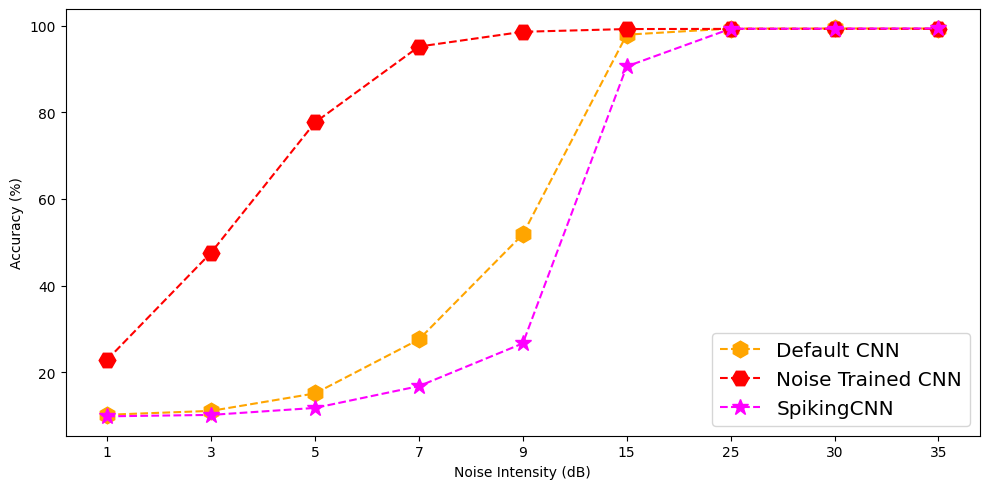

In [14]:
# 박스 플롯 생성
plt.figure(figsize=(10, 5))

if 'resnet50' in viz_set:
    if show_boxplot:
        plt.boxplot(accuracy_resnet50_x, widths=0.3, boxprops=dict(color='blue'), whiskerprops=dict(color='blue'),
                    medianprops=dict(color='blue'), capprops=dict(color='blue'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
        
        plt.boxplot(accuracy_resnet50_o, widths=0.3, boxprops=dict(color='green'), whiskerprops=dict(color='green'),
                    medianprops=dict(color='green'), capprops=dict(color='green'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
    if show_trendline:
        plt.plot([1,2,3,4,5,6,7,8,9], median_resnet50_x, color='blue', linestyle='--', marker='o', markersize=common_props['markersize'], label='Default ResNet50')
        plt.plot([1,2,3,4,5,6,7,8,9], median_resnet50_o, color='green', linestyle='--', marker='^', markersize=common_props['markersize'], label='Noise Trained ResNet50')

if 'resnet101' in viz_set:
    if show_boxplot:
        plt.boxplot(accuracy_resnet101_x, widths=0.3, boxprops=dict(color='lime'), whiskerprops=dict(color='lime'),
                    medianprops=dict(color='lime'), capprops=dict(color='lime'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
        plt.boxplot(accuracy_resnet101_o, widths=0.3, boxprops=dict(color='cyan'), whiskerprops=dict(color='cyan'),
                    medianprops=dict(color='cyan'), capprops=dict(color='cyan'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
    if show_trendline:
        plt.plot([1,2,3,4,5,6,7,8,9], median_resnet101_x, color='lime', linestyle='--', marker='s', markersize=common_props['markersize'], label='No Noise Trained ResNet101')
        plt.plot([1,2,3,4,5,6,7,8,9], median_resnet101_o, color='cyan', linestyle='--', marker='s', markersize=common_props['markersize'], label='No Noise Trained ResNet101')

if 'cnn' in viz_set:
    if show_boxplot:
        plt.boxplot(accuracy_cnn_x, widths=0.3, boxprops=dict(color='orange'), whiskerprops=dict(color='orange'),
                    medianprops=dict(color='orange'), capprops=dict(color='orange'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
        plt.boxplot(accuracy_cnn_o, widths=0.3, boxprops=dict(color='red'), whiskerprops=dict(color='red'),
                    medianprops=dict(color='red'), capprops=dict(color='red'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
    if show_trendline:
        plt.plot([1,2,3,4,5,6,7,8,9], median_cnn_x, color='orange', linestyle='--', marker='h', markersize=common_props['markersize'], label='Default CNN')
        plt.plot([1,2,3,4,5,6,7,8,9], median_cnn_o, color='red', linestyle='--', marker='H', markersize=common_props['markersize'], label='Noise Trained CNN')

if 'snn1' in viz_set:
    if show_boxplot:
        plt.boxplot(accuracy_snn1, widths=0.3, boxprops=dict(color='purple'), whiskerprops=dict(color='purple'),
                    medianprops=dict(color='purple'), capprops=dict(color='purple'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
    if show_trendline:
        plt.plot([1,2,3,4,5,6,7,8,9], median_snn1, color='purple', linestyle='--', marker='d', markersize=common_props['markersize'], label='1xLeaky SpikingResNet')
if 'snn2' in viz_set:
    if show_boxplot:
        plt.boxplot(accuracy_snn2, widths=0.3, boxprops=dict(color='plum'), whiskerprops=dict(color='plum'),
                    medianprops=dict(color='plum'), capprops=dict(color='plum'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
    if show_trendline:
        plt.plot([1,2,3,4,5,6,7,8,9], median_snn2, color='plum', linestyle='--', marker='D', markersize=common_props['markersize'], label='3xLeaky SpikingResNet')
if 'snn3' in viz_set:
    if show_boxplot:
        plt.boxplot(accuracy_snn3, widths=0.3, boxprops=dict(color='magenta'), whiskerprops=dict(color='magenta'),
                    medianprops=dict(color='magenta'), capprops=dict(color='magenta'), showfliers=common_props['showfliers'], showbox=common_props['showbox'])
    if show_trendline:
        plt.plot([1,2,3,4,5,6,7,8,9], median_snn3, color='magenta', linestyle='--', marker='*', markersize=common_props['markersize'], label='SpikingCNN')

# 그래프 제목 및 축 라벨 설정
plt.xlabel('Noise Intensity (dB)')
plt.ylabel('Accuracy (%)')

plt.xticks(ticks=[1,2,3,4,5,6,7,8,9], labels=['1', '3', '5', '7', '9', '15', '25', '30', '35'])

# Y축 값 포맷 설정
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

# 범례 추가
plt.legend(fontsize='x-large')

plt.tight_layout()

plt.savefig('CNN_vs_SpikingCNN_99_MNIST.png')

# 그래프를 화면에 표시
plt.show()